In [110]:
import numpy as np
import matplotlib.pyplot as plt
import os

### Covid

In [96]:
covid_lstm_PICP = np.load("../../output/exp_covid/lstm/lstm_d32_p0.5/1/inference_results/PICP_per_timestep.npy")
covid_smc_PICP = np.load("../../output/exp_covid/smc_t/smc_t_d32_p10/1/inference_results/PICP_per_timestep.npy")
covid_transf_PICP = np.load("../../output/exp_covid/baseline_t/classic_T_d32_p0.5/1/inference_results/PICP_per_timestep.npy")
covid_bayes_PICP = np.load("../../output/exp_covid/covid_bayes/inference_results/PICP_per_timestep.npy")

In [97]:
covid_smc_PICP.shape

(20,)

### Weather

In [98]:
weather_transf_PICP = np.load("../../output/exp_weather/baseline_t/baseline_t_d32_p0.5/1/inference_results/PICP_per_timestep.npy")
weather_lstm_PICP = np.load("../../output/exp_weather/lstm/lstm_d32_p0.5/1/inference_results/PICP_per_timestep.npy")
weather_smc_PICP = np.load("../../output/exp_weather/smc_t_d32_p10/1/inference_results/PICP_per_timestep.npy")
weather_bayes_PICP = np.load("../../output/exp_weather/bayesian_lstm_d32/1/inference_results/PICP_per_timestep.npy")

### air quality

In [99]:
aq_transf_PICP = np.load('../../output/exp_airquality/baseline_t/baseline_t_d32_p0.5/1/inference_results/PICP_per_timestep.npy')
aq_lstm_PICP = np.load('../../output/exp_airquality/lstm/lstm_d32_p0.5/1/inference_results/PICP_per_timestep.npy')
aq_smc_PICP = np.load("../../output/exp_airquality/smc_t/smc_T_d32_10p/1/inference_results/PICP_per_timestep.npy")
aq_bayes_PICP = np.load("../../output/exp_airquality/airquality_bayes/inference_results/PICP_per_timestep.npy")

### energy

In [100]:
energy_transf_PICP = np.load("../../output/exp_energy/baseline_t_d32_p0.5/1/inference_results/PICP_per_timestep.npy")
energy_lstm_PICP = np.load("../../output/exp_energy/lstm_d32_p0.5/1/inference_results/PICP_per_timestep.npy")
energy_smc_PICP = np.load("../../output/exp_energy/smc_t_d32_p10/1/inference_results/PICP_per_timestep.npy")
energy_bayes_PICP = np.load("../../output/exp_energy/bayesian_lstm_d32/1/inference_results/PICP_per_timestep.npy")

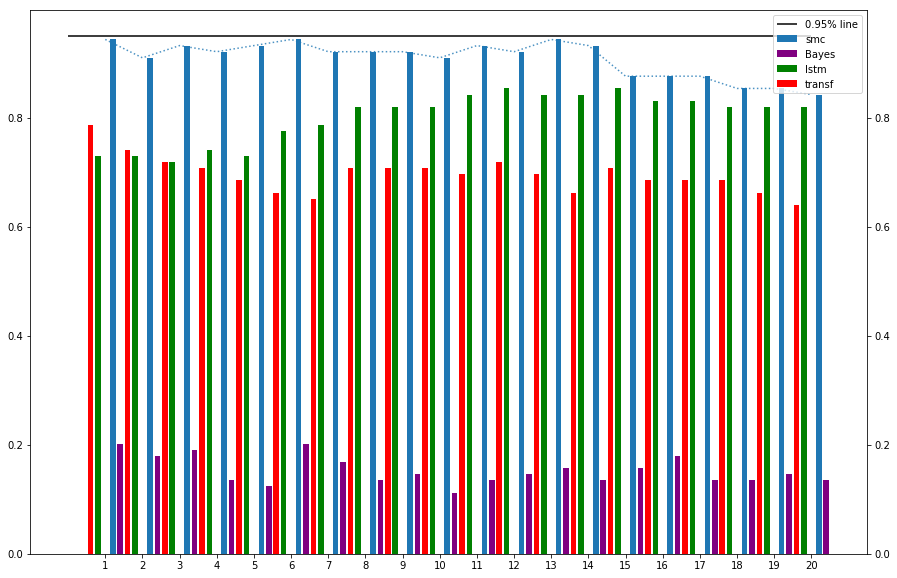

In [101]:
shift = 0.4
fig, ax = plt.subplots(figsize=(15, 10))
x = np.linspace(1,20,20)
ax.bar(x + shift/2, covid_smc_PICP, width=0.15, label='smc')
ax.bar(x + shift, covid_bayes_PICP, width=0.15, label='Bayes', color="purple")
ax.bar(x - shift/2, covid_lstm_PICP, width=0.15, label='lstm', color='green')
ax.bar(x - shift, covid_transf_PICP, width=0.15, label='transf', color='red')
ax.plot(x, covid_smc_PICP, linestyle='dotted', alpha=0.8)
ax.hlines(0.95,0,20,color="black", label="0.95% line")
ax.set_xticks(x)
ax.legend()

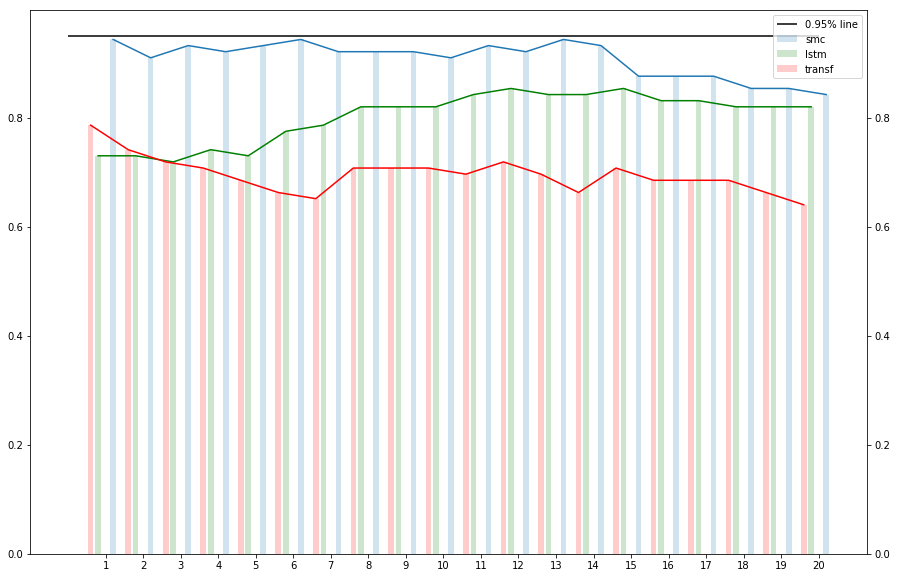

In [102]:
shift = 0.4
fig, ax = plt.subplots(figsize=(15, 10))
x = np.linspace(1,20,20)
ax.bar(x + shift/2, covid_smc_PICP, width=0.15, label='smc', alpha=0.2)
ax.bar(x - shift/2, covid_lstm_PICP, width=0.15, label='lstm', color='green', alpha=0.2)
ax.bar(x - shift, covid_transf_PICP, width=0.15, label='transf', color='red', alpha=0.2)
ax.plot(x + shift/2, covid_smc_PICP)
ax.plot(x - shift/2, covid_lstm_PICP, color='green')
ax.plot(x - shift, covid_transf_PICP, color='red')
ax.hlines(0.95,0,20,color="black", label="0.95% line")
ax.set_xticks(x)
ax.legend()

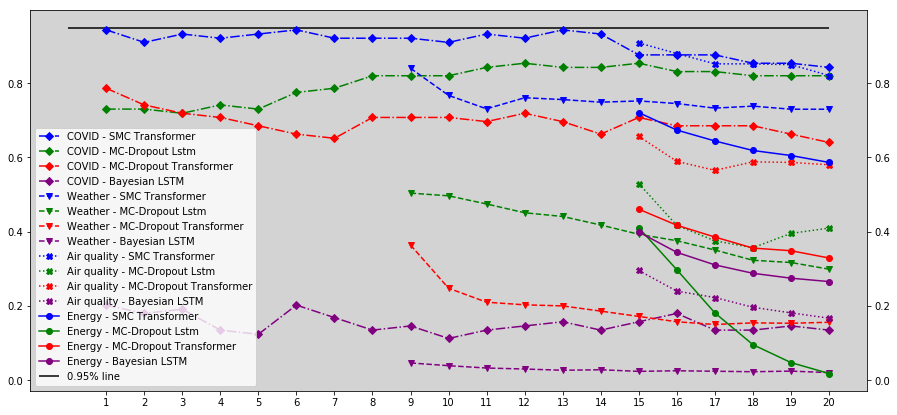

In [103]:
fig, ax = plt.subplots(figsize=(15, 7))
x = np.linspace(1,20,20)
x_w = np.linspace(9,20,12)
x_6 = np.linspace(15,20,6)
ax.plot(x, covid_smc_PICP, label='COVID - SMC Transformer', color='blue', marker='D', linestyle='dashdot')
ax.plot(x, covid_lstm_PICP, color='green', label='COVID - MC-Dropout Lstm', marker='D', linestyle='dashdot')
ax.plot(x, covid_transf_PICP, color='red', label='COVID - MC-Dropout Transformer', marker='D', linestyle='dashdot')
ax.plot(x, covid_bayes_PICP, color='purple', label='COVID - Bayesian LSTM', marker='D', linestyle='dashdot')
ax.plot(x_w, weather_smc_PICP, label='Weather - SMC Transformer', linestyle='dashed', color='blue', marker='v')
ax.plot(x_w, weather_lstm_PICP, color='green', label='Weather - MC-Dropout Lstm', linestyle='dashed', marker='v')
ax.plot(x_w, weather_transf_PICP, color='red', label='Weather - MC-Dropout Transformer', linestyle='dashed', marker='v')
ax.plot(x_w, weather_bayes_PICP, color='purple', label='Weather - Bayesian LSTM', linestyle='dashed', marker='v')
ax.plot(x_6, aq_smc_PICP, label='Air quality - SMC Transformer', marker='X', color='blue', linestyle='dotted')
ax.plot(x_6, aq_lstm_PICP, color='green', label='Air quality - MC-Dropout Lstm', marker='X', linestyle='dotted')
ax.plot(x_6, aq_transf_PICP, color='red', label='Air quality - MC-Dropout Transformer', marker='X', linestyle='dotted')
ax.plot(x_6, aq_bayes_PICP, color='purple', label='Air quality - Bayesian LSTM', marker='X', linestyle='dotted')
ax.plot(x_6, energy_smc_PICP, label='Energy - SMC Transformer', marker='o', color='blue')
ax.plot(x_6, energy_lstm_PICP, color='green', label='Energy - MC-Dropout Lstm', marker='o')
ax.plot(x_6, energy_transf_PICP, color='red', label='Energy - MC-Dropout Transformer', marker='o')
ax.plot(x_6, energy_bayes_PICP, color='purple', label='Energy - Bayesian LSTM', marker='o')
ax.hlines(0.95,0,20,color="black", label="0.95% line")
ax.set_xticks(x)
ax.set_facecolor('lightgrey')
ax.legend()

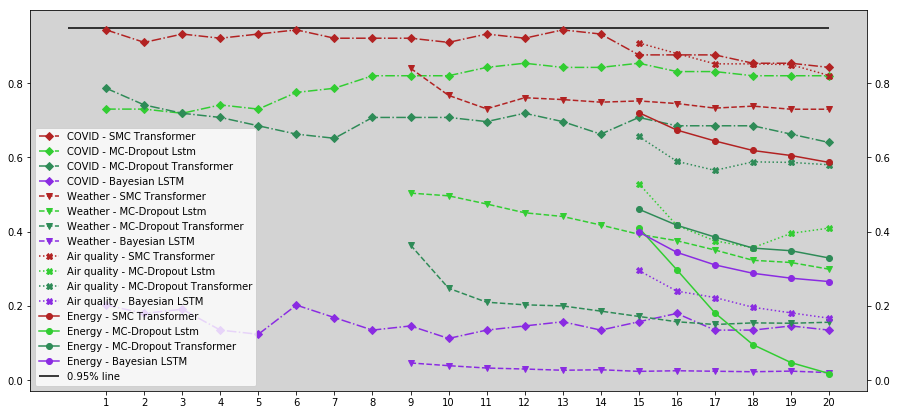

In [104]:
colors = ['firebrick', 'limegreen', 'seagreen', 'blueviolet']
fig, ax = plt.subplots(figsize=(15, 7))
x = np.linspace(1,20,20)
x_w = np.linspace(9,20,12)
x_6 = np.linspace(15,20,6)
ax.plot(x, covid_smc_PICP, label='COVID - SMC Transformer', color=colors[0], marker='D', linestyle='dashdot')
ax.plot(x, covid_lstm_PICP, color=colors[1], label='COVID - MC-Dropout Lstm', marker='D', linestyle='dashdot')
ax.plot(x, covid_transf_PICP, color=colors[2], label='COVID - MC-Dropout Transformer', marker='D', linestyle='dashdot')
ax.plot(x, covid_bayes_PICP, color=colors[3], label='COVID - Bayesian LSTM', marker='D', linestyle='dashdot')
ax.plot(x_w, weather_smc_PICP, label='Weather - SMC Transformer', linestyle='dashed', color=colors[0], marker='v')
ax.plot(x_w, weather_lstm_PICP, color=colors[1], label='Weather - MC-Dropout Lstm', linestyle='dashed', marker='v')
ax.plot(x_w, weather_transf_PICP, color=colors[2], label='Weather - MC-Dropout Transformer', linestyle='dashed', marker='v')
ax.plot(x_w, weather_bayes_PICP, color=colors[3], label='Weather - Bayesian LSTM', linestyle='dashed', marker='v')
ax.plot(x_6, aq_smc_PICP, label='Air quality - SMC Transformer', marker='X', color=colors[0], linestyle='dotted')
ax.plot(x_6, aq_lstm_PICP, color=colors[1], label='Air quality - MC-Dropout Lstm', marker='X', linestyle='dotted')
ax.plot(x_6, aq_transf_PICP, color=colors[2], label='Air quality - MC-Dropout Transformer', marker='X', linestyle='dotted')
ax.plot(x_6, aq_bayes_PICP, color=colors[3], label='Air quality - Bayesian LSTM', marker='X', linestyle='dotted')
ax.plot(x_6, energy_smc_PICP, label='Energy - SMC Transformer', marker='o', color=colors[0])
ax.plot(x_6, energy_lstm_PICP, color=colors[1], label='Energy - MC-Dropout Lstm', marker='o')
ax.plot(x_6, energy_transf_PICP, color=colors[2], label='Energy - MC-Dropout Transformer', marker='o')
ax.plot(x_6, energy_bayes_PICP, color=colors[3], label='Energy - Bayesian LSTM', marker='o')
ax.hlines(0.95,0,20,color="black", label="0.95% line")
ax.set_xticks(x)
ax.set_facecolor('lightgrey')
ax.legend()

Text(0.5,1,'Energy')

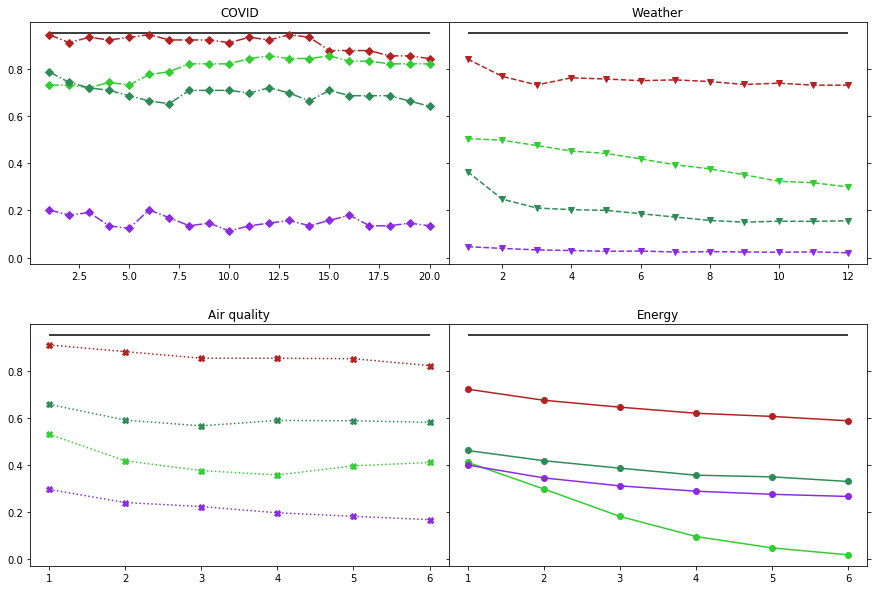

In [105]:
colors = ['firebrick', 'limegreen', 'seagreen', 'blueviolet']
#fig, axs = plt.subplots(2,2,figsize=(15, 7))
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey='row',
                        gridspec_kw={'hspace': 0.25, 'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs
x = np.linspace(1,20,20)
x_w = np.linspace(1,12,12)
x_6 = np.linspace(1,6,6)
ax1.plot(x, covid_smc_PICP, label='COVID - SMC Transformer', color=colors[0], marker='D', linestyle='dashdot')
ax1.plot(x, covid_lstm_PICP, color=colors[1], label='COVID - MC-Dropout Lstm', marker='D', linestyle='dashdot')
ax1.plot(x, covid_transf_PICP, color=colors[2], label='COVID - MC-Dropout Transformer', marker='D', linestyle='dashdot')
ax1.plot(x, covid_bayes_PICP, color=colors[3], label='COVID - Bayesian LSTM', marker='D', linestyle='dashdot')
ax2.plot(x_w, weather_smc_PICP, label='Weather - SMC Transformer', linestyle='dashed', color=colors[0], marker='v')
ax2.plot(x_w, weather_lstm_PICP, color=colors[1], label='Weather - MC-Dropout Lstm', linestyle='dashed', marker='v')
ax2.plot(x_w, weather_transf_PICP, color=colors[2], label='Weather - MC-Dropout Transformer', linestyle='dashed', marker='v')
ax2.plot(x_w, weather_bayes_PICP, color=colors[3], label='Weather - Bayesian LSTM', linestyle='dashed', marker='v')
ax3.plot(x_6, aq_smc_PICP, label='Air quality - SMC Transformer', marker='X', color=colors[0], linestyle='dotted')
ax3.plot(x_6, aq_lstm_PICP, color=colors[1], label='Air quality - MC-Dropout Lstm', marker='X', linestyle='dotted')
ax3.plot(x_6, aq_transf_PICP, color=colors[2], label='Air quality - MC-Dropout Transformer', marker='X', linestyle='dotted')
ax3.plot(x_6, aq_bayes_PICP, color=colors[3], label='Air quality - Bayesian LSTM', marker='X', linestyle='dotted')
ax4.plot(x_6, energy_smc_PICP, label='Energy - SMC Transformer', marker='o', color=colors[0])
ax4.plot(x_6, energy_lstm_PICP, color=colors[1], label='Energy - MC-Dropout Lstm', marker='o')
ax4.plot(x_6, energy_transf_PICP, color=colors[2], label='Energy - MC-Dropout Transformer', marker='o')
ax4.plot(x_6, energy_bayes_PICP, color=colors[3], label='Energy - Bayesian LSTM', marker='o')
ax1.hlines(0.95,1,20,color="black", label="0.95% line")
ax2.hlines(0.95,1,12,color="black", label="0.95% line")
ax3.hlines(0.95,1,6,color="black", label="0.95% line")
ax4.hlines(0.95,1,6,color="black", label="0.95% line")
ax1.set_title("COVID")
ax2.set_title("Weather")
ax3.set_title("Air quality")
ax4.set_title("Energy")
#ax1.set_xticks(x)
#ax2.set_xticks(x_w)
#ax3.set_xticks(x_6)
#ax4.set_xticks(x_6)
#ax.set_facecolor('lightgrey')
#ax1.legend()
#ax2.legend()
#ax3.legend()
#ax4.legend()

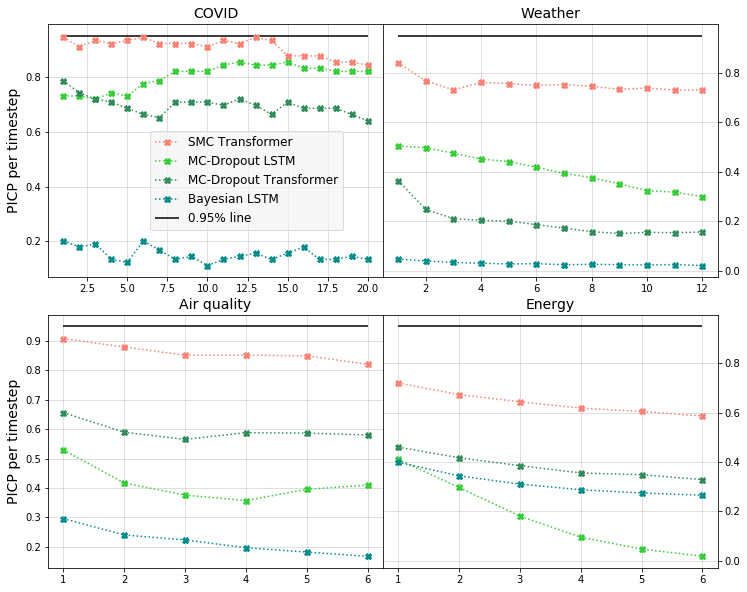

In [126]:
colors = ['salmon', 'limegreen', 'seagreen', 'darkcyan']
#fig, axs = plt.subplots(2,2,figsize=(15, 7))
fig, axs = plt.subplots(2, 2, figsize=(12, 10),
                        gridspec_kw={'hspace': 0.15, 'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs
x = np.linspace(1,20,20)
x_w = np.linspace(1,12,12)
x_6 = np.linspace(1,6,6)
ax1.plot(x, covid_smc_PICP, label='SMC Transformer', color=colors[0], marker='X', linestyle='dotted')
ax1.plot(x, covid_lstm_PICP, color=colors[1], label='MC-Dropout LSTM', marker='X', linestyle='dotted')
ax1.plot(x, covid_transf_PICP, color=colors[2], label='MC-Dropout Transformer', marker='X', linestyle='dotted')
ax1.plot(x, covid_bayes_PICP, color=colors[3], label='Bayesian LSTM', marker='X', linestyle='dotted')
ax2.plot(x_w, weather_smc_PICP, label='Weather - SMC Transformer', linestyle='dotted', color=colors[0], marker='X')
ax2.plot(x_w, weather_lstm_PICP, color=colors[1], label='Weather - MC-Dropout Lstm', linestyle='dotted', marker='X')
ax2.plot(x_w, weather_transf_PICP, color=colors[2], label='Weather - MC-Dropout Transformer', linestyle='dotted', marker='X')
ax2.plot(x_w, weather_bayes_PICP, color=colors[3], label='Weather - Bayesian LSTM', linestyle='dotted', marker='X')
ax3.plot(x_6, aq_smc_PICP, label='Air quality - SMC Transformer', marker='X', color=colors[0], linestyle='dotted')
ax3.plot(x_6, aq_lstm_PICP, color=colors[1], label='Air quality - MC-Dropout Lstm', marker='X', linestyle='dotted')
ax3.plot(x_6, aq_transf_PICP, color=colors[2], label='Air quality - MC-Dropout Transformer', marker='X', linestyle='dotted')
ax3.plot(x_6, aq_bayes_PICP, color=colors[3], label='Air quality - Bayesian LSTM', marker='X', linestyle='dotted')
ax4.plot(x_6, energy_smc_PICP, label='Energy - SMC Transformer', marker='X', color=colors[0], linestyle='dotted')
ax4.plot(x_6, energy_lstm_PICP, color=colors[1], label='Energy - MC-Dropout Lstm', marker='X', linestyle='dotted')
ax4.plot(x_6, energy_transf_PICP, color=colors[2], label='Energy - MC-Dropout Transformer', marker='X', linestyle='dotted')
ax4.plot(x_6, energy_bayes_PICP, color=colors[3], label='Energy - Bayesian LSTM', marker='X', linestyle='dotted')
ax1.hlines(0.95,1,20,color="black", label="0.95% line")
ax2.hlines(0.95,1,12,color="black", label="0.95% line")
ax3.hlines(0.95,1,6,color="black", label="0.95% line")
ax4.hlines(0.95,1,6,color="black", label="0.95% line")
ax1.set_title("COVID", fontsize=14)
ax2.set_title("Weather", fontsize=14)
ax3.set_title("Air quality", fontsize=14)
ax4.set_title("Energy", fontsize=14)
ax1.set_ylabel('PICP per timestep', fontsize=14)
ax3.set_ylabel('PICP per timestep', fontsize=14)
ax1.grid('on', alpha=0.5)
ax2.grid('on', alpha=0.5)
ax3.grid('on', alpha=0.5)
ax4.grid('on', alpha=0.5)
ax2.yaxis.tick_right()
ax4.yaxis.tick_right()
ax1.legend(markerscale=1, fontsize=12, loc='upper right', bbox_to_anchor=(0.9,0.6), 
           facecolor='whitesmoke', framealpha=0.7)
plt.savefig(os.path.join("../../output/plots", "PICP_per_timestep_4datasets.png"), bbox_inches="tight")


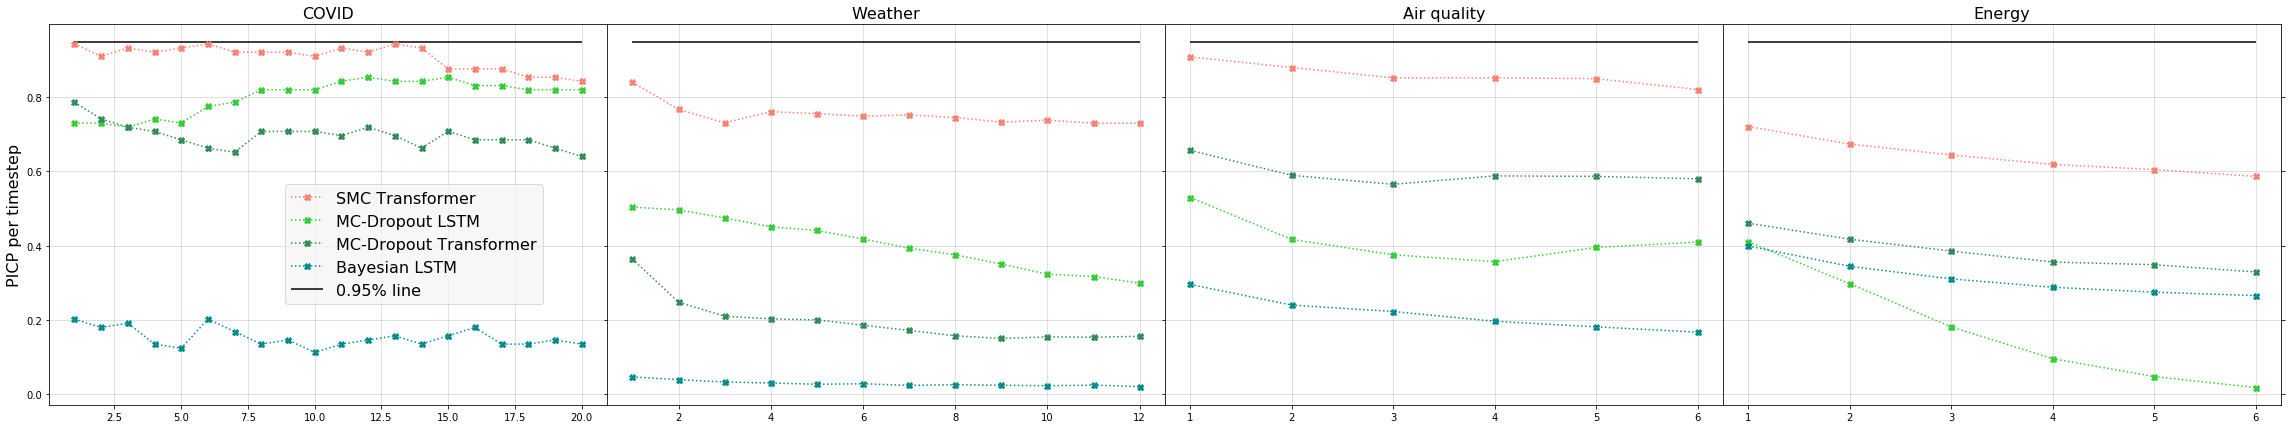

In [125]:
colors = ['salmon', 'limegreen', 'seagreen', 'darkcyan']
fig, axs = plt.subplots(1, 4, figsize=(40, 7), sharey='row',
                        gridspec_kw={'hspace': 0.15, 'wspace': 0})
ax1, ax2, ax3, ax4 = axs
x = np.linspace(1,20,20)
x_w = np.linspace(1,12,12)
x_6 = np.linspace(1,6,6)
ax1.plot(x, covid_smc_PICP, label='SMC Transformer', color=colors[0], marker='X', linestyle='dotted')
ax1.plot(x, covid_lstm_PICP, color=colors[1], label='MC-Dropout LSTM', marker='X', linestyle='dotted')
ax1.plot(x, covid_transf_PICP, color=colors[2], label='MC-Dropout Transformer', marker='X', linestyle='dotted')
ax1.plot(x, covid_bayes_PICP, color=colors[3], label='Bayesian LSTM', marker='X', linestyle='dotted')
ax2.plot(x_w, weather_smc_PICP, label='Weather - SMC Transformer', linestyle='dotted', color=colors[0], marker='X')
ax2.plot(x_w, weather_lstm_PICP, color=colors[1], label='Weather - MC-Dropout Lstm', linestyle='dotted', marker='X')
ax2.plot(x_w, weather_transf_PICP, color=colors[2], label='Weather - MC-Dropout Transformer', linestyle='dotted', marker='X')
ax2.plot(x_w, weather_bayes_PICP, color=colors[3], label='Weather - Bayesian LSTM', linestyle='dotted', marker='X')
ax3.plot(x_6, aq_smc_PICP, label='Air quality - SMC Transformer', marker='X', color=colors[0], linestyle='dotted')
ax3.plot(x_6, aq_lstm_PICP, color=colors[1], label='Air quality - MC-Dropout Lstm', marker='X', linestyle='dotted')
ax3.plot(x_6, aq_transf_PICP, color=colors[2], label='Air quality - MC-Dropout Transformer', marker='X', linestyle='dotted')
ax3.plot(x_6, aq_bayes_PICP, color=colors[3], label='Air quality - Bayesian LSTM', marker='X', linestyle='dotted')
ax4.plot(x_6, energy_smc_PICP, label='Energy - SMC Transformer', marker='X', color=colors[0], linestyle='dotted')
ax4.plot(x_6, energy_lstm_PICP, color=colors[1], label='Energy - MC-Dropout Lstm', marker='X', linestyle='dotted')
ax4.plot(x_6, energy_transf_PICP, color=colors[2], label='Energy - MC-Dropout Transformer', marker='X', linestyle='dotted')
ax4.plot(x_6, energy_bayes_PICP, color=colors[3], label='Energy - Bayesian LSTM', marker='X', linestyle='dotted')
ax1.hlines(0.95,1,20,color="black", label="0.95% line")
ax2.hlines(0.95,1,12,color="black", label="0.95% line")
ax3.hlines(0.95,1,6,color="black", label="0.95% line")
ax4.hlines(0.95,1,6,color="black", label="0.95% line")
ax1.set_title("COVID", fontsize=16)
ax2.set_title("Weather", fontsize=16)
ax3.set_title("Air quality", fontsize=16)
ax4.set_title("Energy", fontsize=16)
ax1.set_ylabel('PICP per timestep', fontsize=16)
#ax3.set_ylabel('PICP per timestep', fontsize=14)
ax1.grid('on', alpha=0.5)
ax2.grid('on', alpha=0.5)
ax3.grid('on', alpha=0.5)
ax4.grid('on', alpha=0.5)
#ax2.yaxis.tick_right()
ax4.yaxis.tick_right()
ax1.legend(markerscale=1, fontsize=16, loc='upper right', bbox_to_anchor=(0.9,0.6), 
           facecolor='whitesmoke', framealpha=0.7)
plt.savefig(os.path.join("../../output/plots", "PICP_per_timestep_4datasets_horizontal.png"), bbox_inches="tight")